In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import mplcyberpunk
from scipy.stats import norm
import statsmodels.api as sm

plt.style.use('cyberpunk')

T2 = ["Prob","Macro","ITC","ITDS","IC"]
T1 = ["LSE-I","MIE-I","PHIL-I","ITA","DC","SM-I","SOC-I","Dance/Drama",]

In [2]:
# Load Term 2 tentative data

dataframe = pd.read_excel("C:\\Users\\HP\\Documents\\Term-2 Sheet\\MAIN.xlsx", sheet_name="Total")
dataframe.drop(axis=1, labels=["Overall ABS Score","Unnamed: 10", "Unnamed: 11", 	"Unnamed: 12", "Unnamed: 13"], inplace=True)  # Drop unused columns 

#Normalize data
def normalize(df: pd.DataFrame, cols:list):
    for col in cols:
        df[f'{col}_raw'] = df[col]
        df[col] =( df[col] - df[col].mean() )/ df[col].std()

normalize(dataframe, T2)

In [3]:
#Load term 1 computed GPA sheet

term1 = pd.read_excel("Term1-Final-Computed.xlsx", sheet_name='RAW')
term1.fillna(0, inplace=True)
term1['Dance/Drama'] = term1['Dance -I'] + term1['Drama- I']
normalize(term1, T1) # Normalize all scores


In [4]:
#Merge Databases into 1: 
combined = pd.merge(dataframe, term1, how='outer', on='Roll No.')
combined.set_index('Roll No.', inplace=True)
raw = combined
combined=combined[T1 + T2]
# combined.describe()

Text(0.5, 1.0, 'Term 1 normalized score correlation matrix')

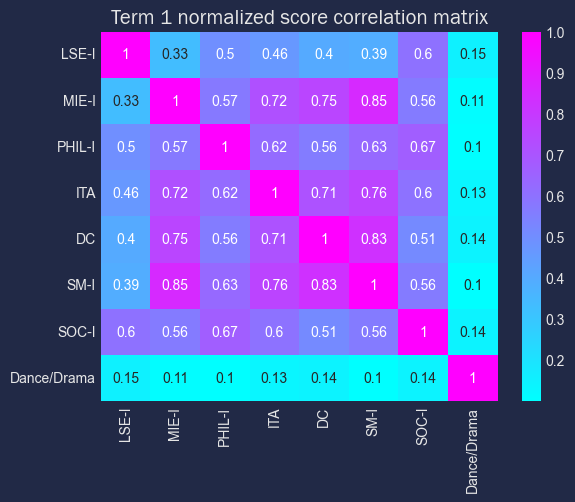

In [5]:
T1_data = combined[T1] #only with normalized subjects from T1. 
sb.heatmap(T1_data.corr(), annot=True, cmap='cool')
plt.title('Term 1 normalized score correlation matrix', fontdict={'font': 'franklin gothic book', 'size': '15'})
# sb.heatmap(combined[T2].corr(), annot=True, cmap='Reds')

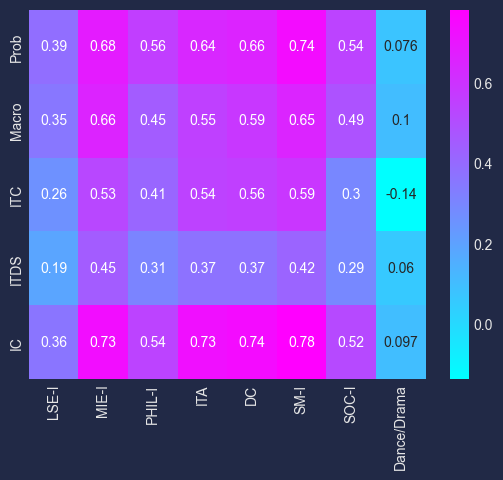

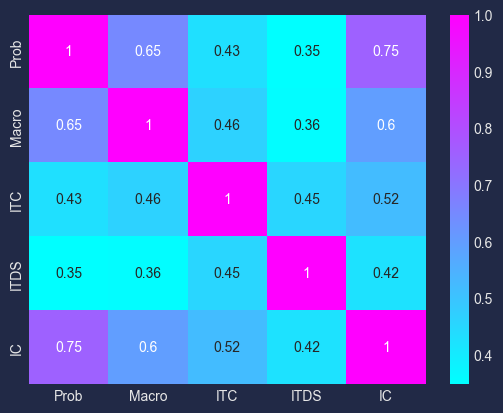

In [6]:
overall_corr = combined[T1 + T2].corr()

#Remove Term 2 subjects from X axis and Term 1 subjects from Y axis to prevent repetition 
overall_corr.drop(columns=T2, inplace=True) 
overall_corr.drop(T1, axis='index', inplace=True)

sb.heatmap(overall_corr, annot=True, cmap='cool')
plt.show()
sb.heatmap(combined[T2].corr(), annot=True, cmap='cool')
plt.show()

Text(0, 0.5, 'Normalized Probability-1 Scores')

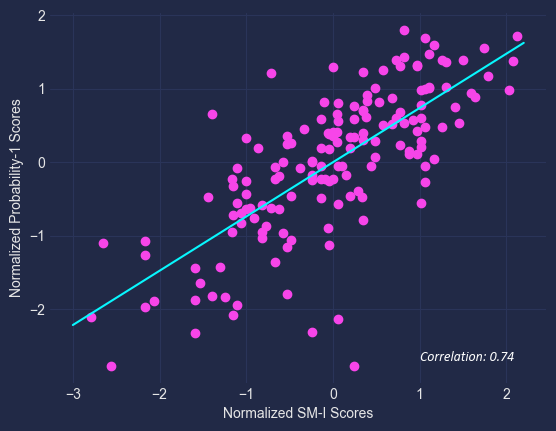

In [7]:
#Scatterplots

#Generate regression line

b, a = np.polyfit(combined['SM-I'], combined['Prob'], deg=1)
line = np.linspace(-3,2.2, num=100)

plt.scatter(x=combined['SM-I'], y=combined['Prob'], color='#f745e9') #Generate scatter plot
plt.plot(line, a + b*line)  #Plot regression line
plt.text(x=1, y=-2.7, s='Correlation: 0.74', color='white', fontdict={'font':'calibri', 'style':'italic'})
plt.xlabel('Normalized SM-I Scores'); plt.ylabel('Normalized Probability-1 Scores')

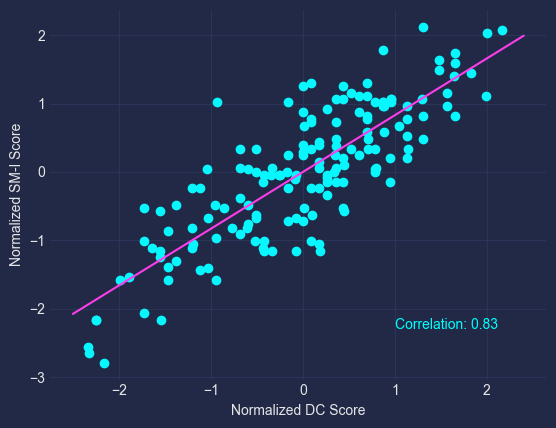

In [8]:
plt.scatter(x=combined["DC"], y=combined["SM-I"])

# Generate regression line
b, a = np.polyfit(combined['DC'], combined['SM-I'], deg=1)
line = np.linspace(-2.5, 2.4, num=100)

plt.plot(line, a+b*line, color='#fa3eea')

plt.xlabel('Normalized DC Score')
plt.ylabel('Normalized SM-I Score')
plt.text(x=1, y=-2.3, s='Correlation: 0.83', color='cyan')

plt.show()

Lilliefors: Normal
0.4015682366562835


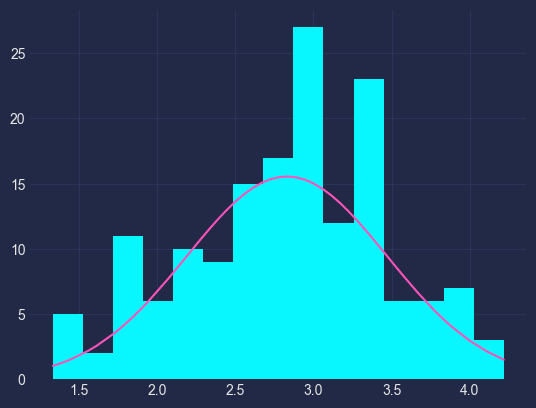

In [9]:
count_data = plt.hist(raw['DC_raw'],bins=15,)
arranged = raw['DC_raw'].sort_values()
plt.plot(arranged, 25*norm.pdf(arranged, arranged.mean(), arranged.std()))
alpha = 0.05
ksstat, pvalue = sm.stats.diagnostic.lilliefors(count_data[0])
if pvalue > alpha:
    result = 'Normal'
else:
    result = 'NOT Normal'
print(f'Lilliefors: {result}')
print(pvalue)

Lilliefors: Normal
0.5413881307627717


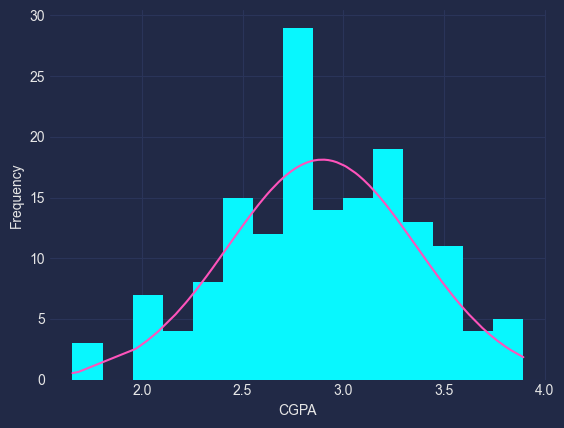

In [10]:
a1 = plt.hist(raw['CGPA'], bins=15)
avg = a1[0].mean()
arranged = raw['CGPA'].sort_values()
normal = norm.pdf(arranged, arranged.mean(), arranged.std())
plt.plot(arranged, 2*avg*normal)
plt.xlabel('CGPA')
plt.ylabel('Frequency')

ksstat, pvalue = sm.stats.diagnostic.lilliefors(a1[0])
if pvalue > alpha:
    result = 'Normal'
else:
    result = 'NOT Normal'
print(f'Lilliefors: {result}')
print(pvalue)